Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.74      0.81      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



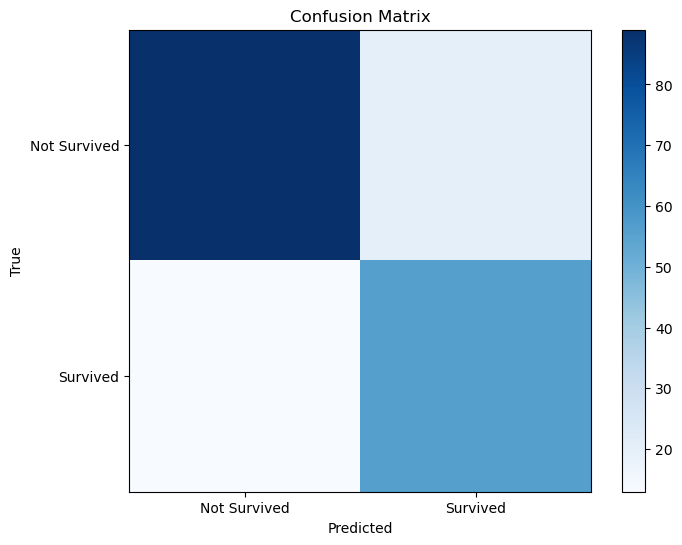

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming the dataset is saved in the current directory or provide the correct path
df = pd.read_csv('Titanic-Dataset.csv')

# Example of handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

# Example of encoding categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Selecting features and target
X = df[['Pclass', 'Sex_male', 'Age', 'Fare']]
y = df['Survived']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Optional: Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.yticks([0, 1], ['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
